Prétraitement des données et exploration


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

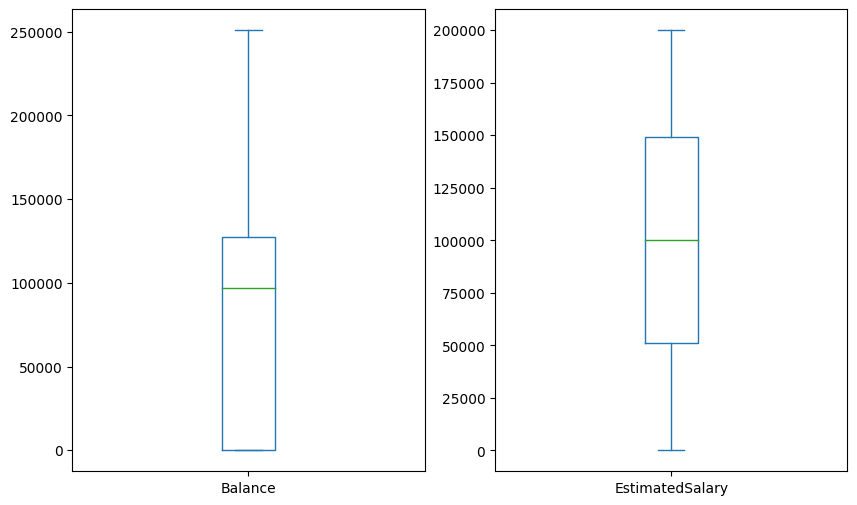

Qustion 16


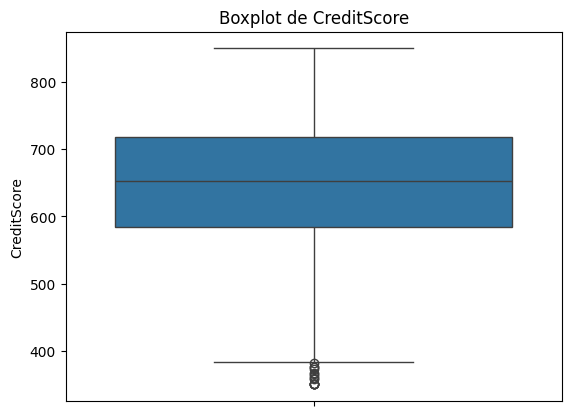

Qustion 17
Nombre de points aberrants pour 'CreditScore': 15
Qustion 18
Taux de churn pour un faible 'CreditScore': 21.94%
Qustion 19
Taux de churn pour les clients âgés de 45 à 55 ans: 48.70%
Qustion 20
Qustion 21 
Qustion 22
Qustion 23


In [ ]:
# 1. Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# 2. Télécharger le fichier Churn_Modelling.csv
df = pd.read_csv('Churn_Modelling.csv')

# 3. Afficher les données
print(df.head())

# 4. Donner la taille du dataset
print("Qustion 4")
print("Taille du dataset:", df.shape)

# 5. Afficher tous les noms de colonnes du DataFrame sous forme de liste
print("Qustion 5")
print("Colonnes:", df.columns.tolist())

# 6. Supprimer les 3 premières colonnes et afficher de nouveau les données
print("Qustion 6")
df = df.drop(df.columns[:3], axis=1)
print(df.head())

# 7. Identifier et compter les valeurs manquantes dans chaque colonne
print("Qustion 7")
print("Valeurs manquantes par colonne:", df.isnull().sum())

# 8. Donner un aperçu rapide de la structure du DataFrame
print("Qustion 8")
print(df.info())

# 9. Donner des statistiques descriptives sur les colonnes numériques
print("Qustion 9")
print(df.describe())

# 10. Calculer le taux de churn (pourcentage de clients ayant quitté)
print("Qustion 10")
churn_rate = df['Exited'].mean() * 100
print(f"Taux de churn: {churn_rate:.2f}%")

# 11. Description des variables de type object
print("Qustion 11")
print(df.select_dtypes(include=['object']).describe())

# 12. Donnez toutes les valeurs uniques présentes dans la colonne Geography
print("Qustion 12")
print("Valeurs uniques dans 'Geography':", df['Geography'].unique())

# 13. Nombre de clients par Geography
print("Qustion 13")
print("Nombre de clients par région:")
print(df['Geography'].value_counts())

# 14. Créer une liste pour les variables 'Balance' et 'EstimatedSalary'
print("Qustion14 ")
my_list = ['Balance', 'EstimatedSalary']

# 15. Afficher les Boxplot des variables de my_list
print("Qustion 15")
df[my_list].plot(kind='box', subplots=True, layout=(1, 2), figsize=(10, 6))
plt.show()

# 16. Afficher le Boxplot de 'CreditScore'
print("Qustion 16")
sns.boxplot(df['CreditScore'])
plt.title('Boxplot de CreditScore')
plt.show()

# 17. Détection des points aberrants pour 'CreditScore'
print("Qustion 17")
Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['CreditScore'] < (Q1 - 1.5 * IQR)) | (df['CreditScore'] > (Q3 + 1.5 * IQR))]
print("Nombre de points aberrants pour 'CreditScore':", outliers.shape[0])

# 18. Taux de churn pour ceux ayant un faible score CreditCard
print("Qustion 18")
low_credit_score = df[df['CreditScore'] <= Q1]
low_credit_churn_rate = low_credit_score['Exited'].mean() * 100
print(f"Taux de churn pour un faible 'CreditScore': {low_credit_churn_rate:.2f}%")

# 19. Taux de churn pour les clients âgés entre 45 et 55 ans
print("Qustion 19")
churn_age_45_55 = df[(df['Age'] >= 45) & (df['Age'] <= 55)]['Exited'].mean() * 100
print(f"Taux de churn pour les clients âgés de 45 à 55 ans: {churn_age_45_55:.2f}%")

# 20. Séparation des données explicatives et cibles
print("Qustion 20")
X = df.drop('Exited', axis=1)
y = df['Exited']

# 21. Conversion en tableau NumPy
print("Qustion 21 ")
X = X.values
y = y.values

# 22. Conversion des variables catégorielles en numériques
print("Qustion 22")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])  # Pour Geography
X[:, 2] = le.fit_transform(X[:, 2])  # Pour Gender

# 23. Division des données en ensemble d'apprentissage et de test
print("Qustion 23")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)







KNN (K-Nearest Neighbors



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Appliquer la classification KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 2. Prédire et calculer les métriques d'évaluation
y_proba_knn  = knn.predict(X_test)
print("Classification KNN:\n", classification_report(y_test, y_pred))


Classification KNN:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



Validation croisée pour déterminer le meilleur k


In [ ]:
from sklearn.model_selection import cross_val_score

# 3. Validation croisée pour trouver le meilleur k
k_range = range(1, 26)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

best_k = k_range[k_scores.index(max(k_scores))]
print(f"Le meilleur k est: {best_k}")


Le meilleur k est: 16


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Appliquer la classification KNN
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

# 2. Prédire et calculer les métriques d'évaluation
y_pred = knn.predict(X_test)
print("Classification KNN:\n", classification_report(y_test, y_pred))


Classification KNN:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89      1607
           1       0.15      0.01      0.01       393

    accuracy                           0.80      2000
   macro avg       0.48      0.50      0.45      2000
weighted avg       0.68      0.80      0.72      2000



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 4. Appliquer Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédire et afficher les métriques d'évaluation
y_pred_rf = rf.predict(X_test)
print("Classification Random Forest:\n", classification_report(y_test, y_pred_rf))

# 5. Extraire les meilleurs descripteurs
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Les descripteurs les plus importants sont:")
for i in range(5):
    print(f"{df.columns[indices[i]]}: {importances[indices[i]]}")


Classification Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Les descripteurs les plus importants sont:
Age: 0.24045295050186827
EstimatedSalary: 0.1480038701249555
CreditScore: 0.14236885408030386
Balance: 0.1386702762584344
NumOfProducts: 0.13206104315540018


SVM


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Appliquer la classification SVM
svm_model = SVC(probability=True)  # Ajouter probability=True pour utiliser predict_proba si nécessaire
svm_model.fit(X_train, y_train)

# 2. Prédire et calculer les métriques d'évaluation
y_pred_svm = svm_model.predict(X_test)

# Affichage du rapport de classification
print("Classification SVM:\n", classification_report(y_test, y_pred_svm))


Classification SVM:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



Régression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# 1. Standardiser les données (optionnel mais recommandé)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Appliquer la régression logistique
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# 3. Prédire et afficher les métriques d'évaluation
y_pred_lr = log_reg.predict(X_test_scaled)
print("Classification Régression Logistique:\n", classification_report(y_test, y_pred_lr))


Classification Régression Logistique:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



Comparaison avec la courbe ROC


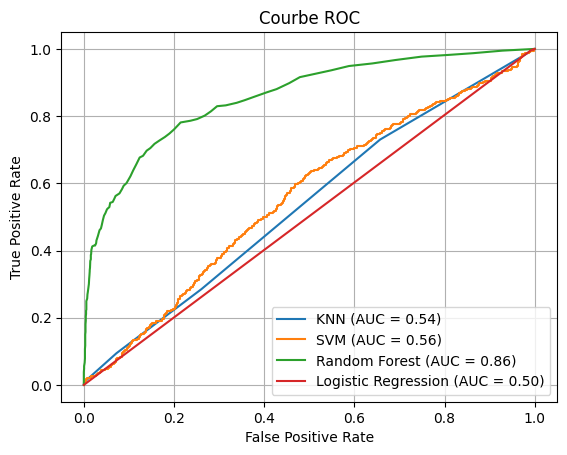

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcul des probabilités pour chaque modèle
y_proba_knn = knn.predict_proba(X_test)[:, 1]
y_pred_svm = svm_model.predict_proba(X_test)[:, 1]  # Probabilités pour SVM
y_pred_rf = rf.predict_proba(X_test)[:, 1]          # Probabilités pour Random Forest
y_pred_lr = log_reg.predict_proba(X_test)[:, 1]     # Probabilités pour la régression logistique

# Tracer la courbe ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

plt.figure()
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(auc(fpr_knn, tpr_knn)))
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(auc(fpr_svm, tpr_svm)))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc(fpr_rf, tpr_rf)))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(auc(fpr_lr, tpr_lr)))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.grid()
plt.show()
